# Word Cloud Style DataMapPlots

This notebook will walk through some of the options and best practices for static data maps that place the label text over top of the actual data points (rather than in a ring outside), providing a word-cloud like appearance. To get started we'll need to import DataMapPlot. Also, for the purposes of this documentation, I need to keep the image sizes smaller to fit in readthedocs; because of that I will set the global DPI for matplotlib (which DataMapPlot uses for plotting), but you should probably remove those lines if you are running this notebook yourself.

In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib

matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

To demonstrate the word-cloud style plots do we'll need some data. The examples directory of the DataMapPlot repository contains some pre-prepared datasets for experimenting with. We'll grab one of those. In practice we need a data map -- as set of 2d coordinates, one per data sample we are mapping -- and a set of labels idenityfing the "topic" of a data sample, usually based on clusters in the data map. In this case we'll use data from the titles and abstracts of papers from the machine learning section of the ArXiv preprint server.

In [2]:
import numpy as np
import requests
import io

data_map_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/arxiv_ml_data_map.npy"
)
arxivml_data_map = np.load(io.BytesIO(data_map_file.content))
label_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/arxiv_ml_cluster_labels.npy"
)
arxivml_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)

To provide a point of comparison let's make a standard plot with DataMapPlot so we can see what the ordinary label placement looks like... 

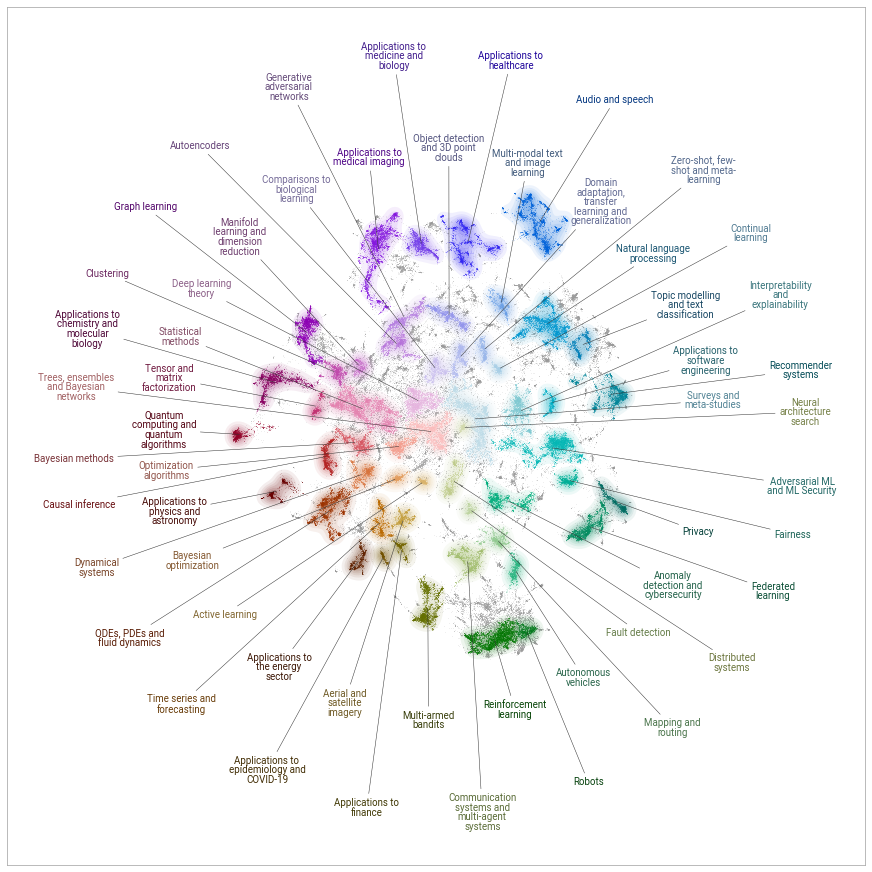

In [3]:
fig, ax = datamapplot.create_plot(arxivml_data_map, arxivml_labels)

This approach allows us to see the actual structure of the datamap, with the various points, clusters and sub-clusters. However, byt putting all the labels around the outside we have used up valuable plotting space with the labels, which makes the actual data map itself that much smaller. We can instead place the labels directly over top of the clusters themselves. Of course this can tend to cause issues with overlapping labels, especially amongst closely packed together clusters. To remedy this we can use some heuristics to choose a good label text size to avoid the worst of the overlap, and then reply on the remarkable [pylabeladjust](https://github.com/MNoichl/pylabeladjust) by Maximillian Noichl to fine tune the label placement to avoid overlaps. All of this is handled by simply setting ``label_over_points=True``.

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


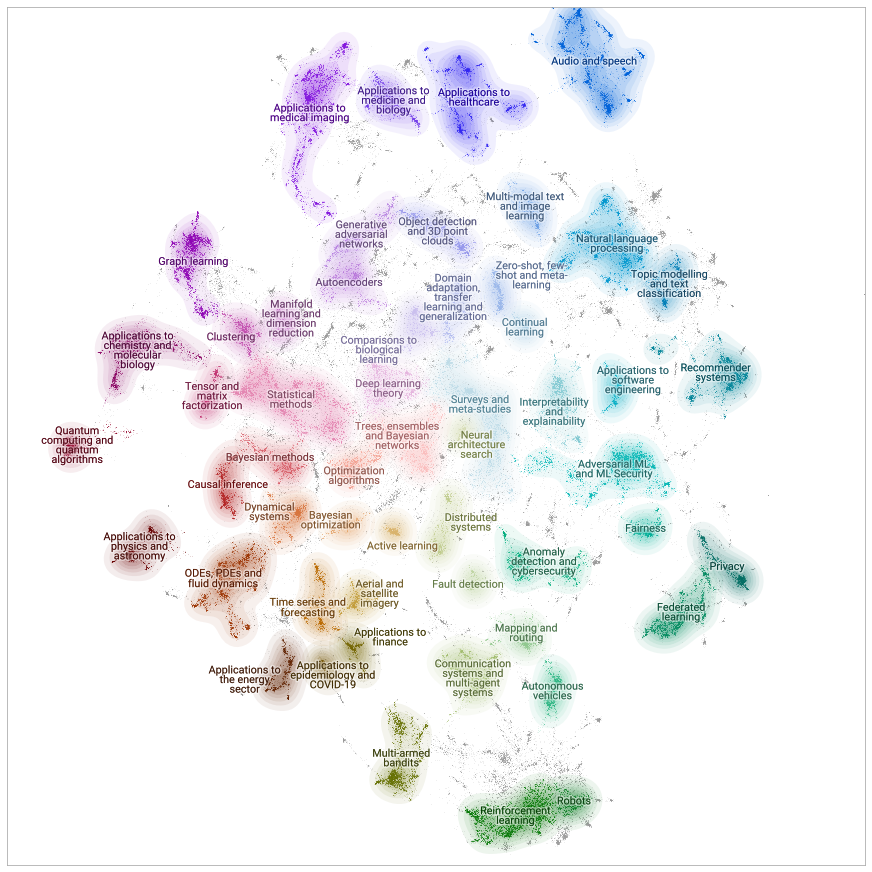

In [4]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map, arxivml_labels, label_over_points=True
)

This makes our actual data map larger, and still provides useful labelling. We are covering some of the points now, but if our goal is to provide an general overview of the relationships between different subjects then that is less important. To make this even more like a word-cloud we could have the labels vary in size according to the size of the cluster. The ``dynamic_label_size`` is the best way to handle that:

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


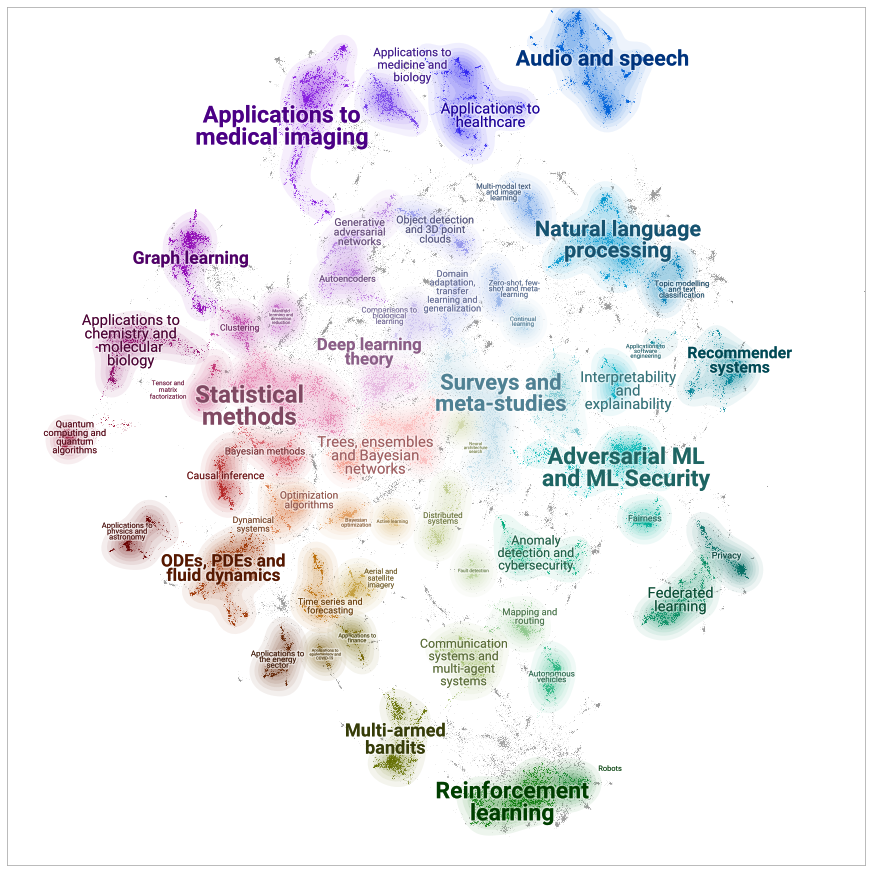

In [5]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map, arxivml_labels, label_over_points=True, dynamic_label_size=True
)

You can control how much the label size varies by adjusting the ``dynamic_label_size_scaling_factor``. Values smaller than 1.0 will make the font sizes more even, with a value of 0.0 resulting in all labels being the same size. Values larger than 1.0 will result in emphasising the variation in cluster size in terms of label size. The default value is 0.75 which provides some compromise, but for highly variable cluster sizes smaller values will be desireable. We can turn it down to 0.5 and see the result. Further control is available in the form of ``max_font_size`` and ``min_font_size``. These are the maximum and minimum font sizes, in points, that the labels can be. In practice the minimum will always be realised, while the maximum is an upper bound, and a maximum font size that provides the best chance of fitting all the labels well will get used.

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


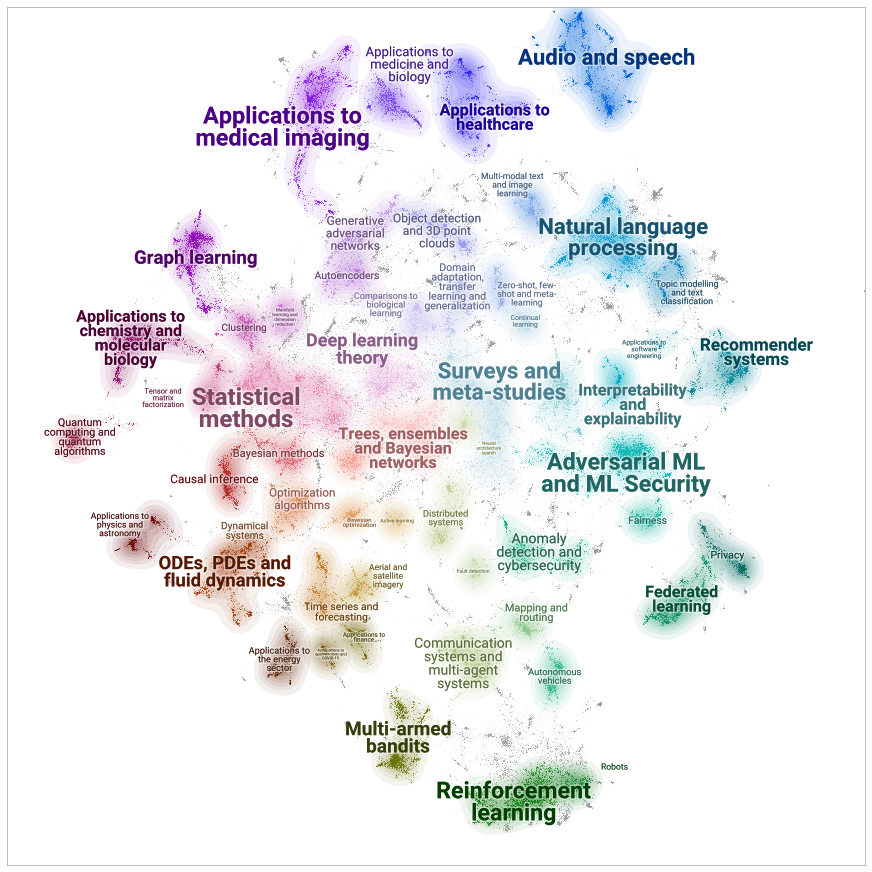

In [6]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    label_over_points=True,
    dynamic_label_size=True,
    dynamic_label_size_scaling_factor=0.5,
    max_font_size=24,
    min_font_size=4,
)

You might notice that the font weight varies as well -- the labels for larger clusters are bold faced, while the smaller clusters get a more normal looking typeface. This, also, is controllable via the ``min_font_weight`` and ``max_font_weight`` which should be values on the scale 1 (for ultra thin) to 1000 (for extra black). See [CSS documentation](https://developer.mozilla.org/en-US/docs/Web/CSS/font-weight) for more details on this scale for font-weights. Of course not all fonts support allm weights in the range so you will also need to select your font appropriately. Here we will restrict to relatively fine font weights

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


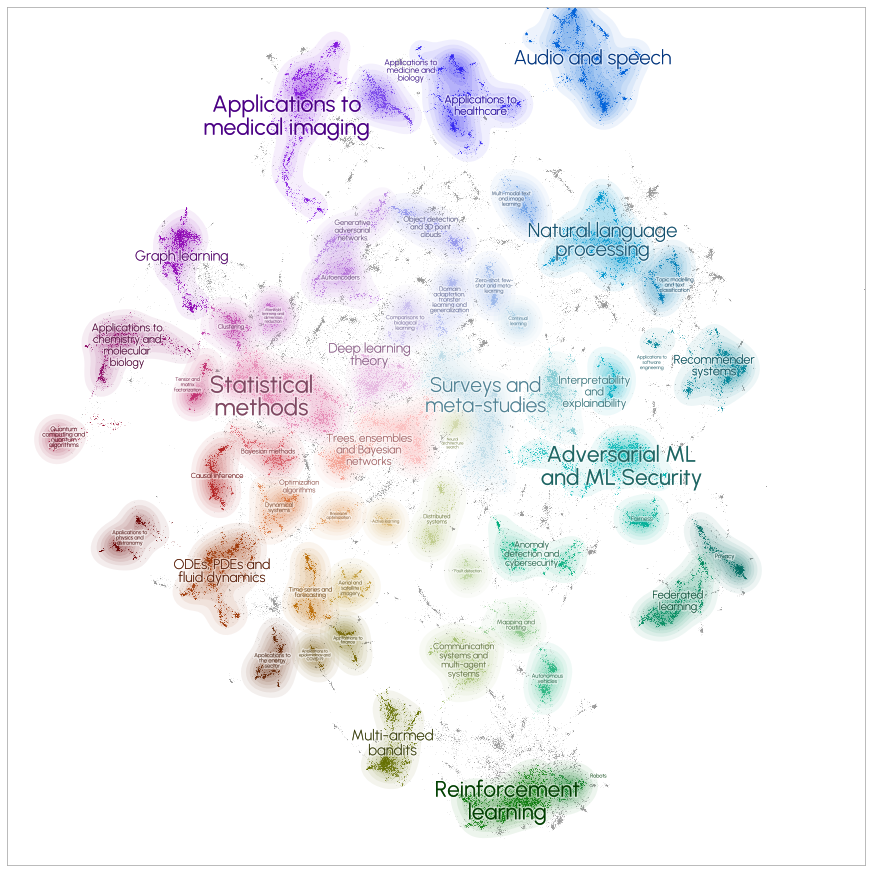

In [7]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    label_over_points=True,
    dynamic_label_size=True,
    dynamic_label_size_scaling_factor=1.5,
    font_family="Urbanist",
    max_font_size=24,
    min_font_size=4,
    min_font_weight=100,
    max_font_weight=400,
)

There is also the usual options with regard to colour. For instance ``darkmode`` will work as expected, and ``color_label_text`` will allow you to turn off the matching of font colours to cluster colours (by setting it to ``False``), or set a fixed colour for all the labels (by setting it to a string colour specification). 

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


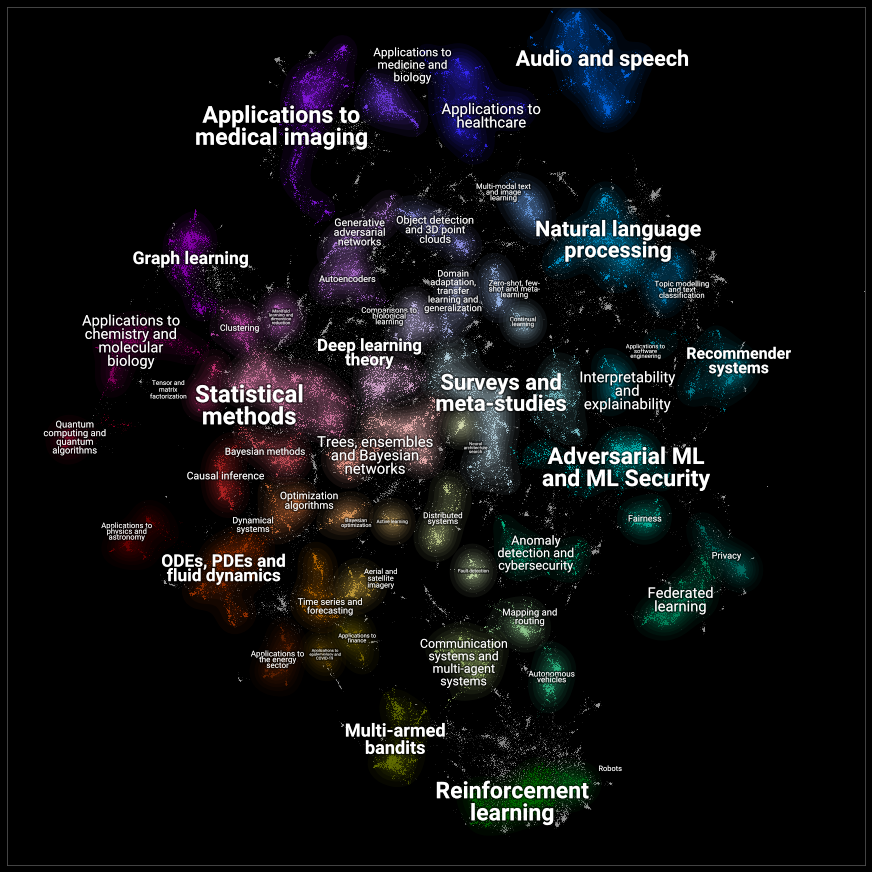

In [8]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    label_over_points=True,
    dynamic_label_size=True,
    color_label_text=False,
    darkmode=True,
)

Putting all of this toegther we can get some pretty dramatic and good looking results with relative ease.

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


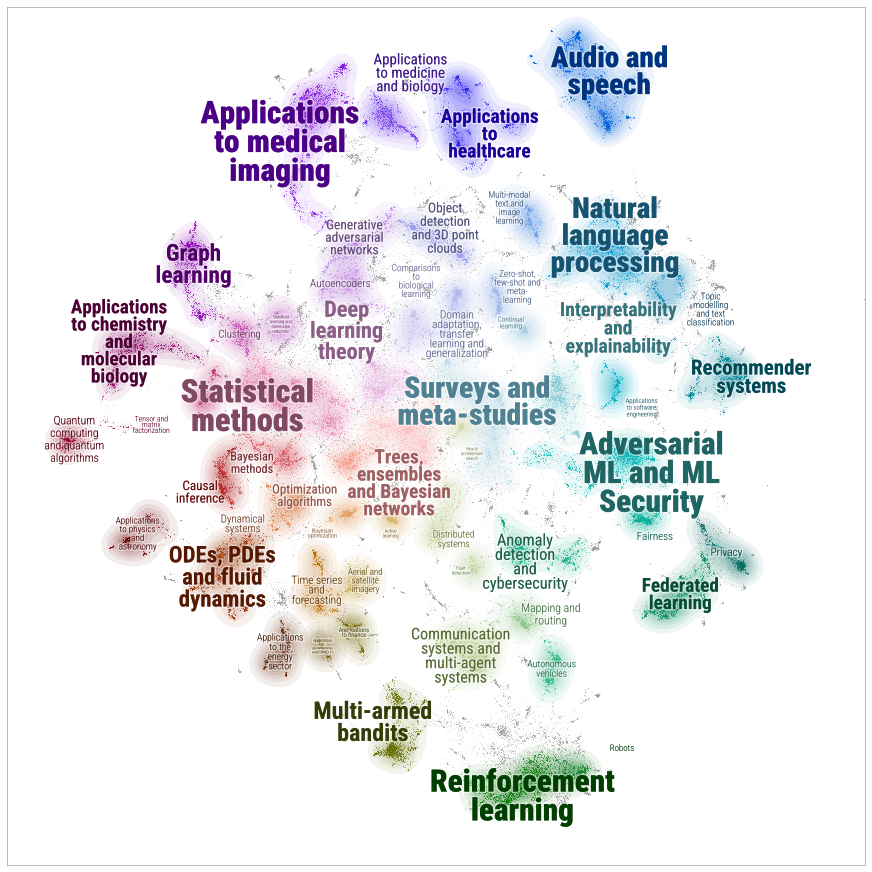

In [9]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    label_wrap_width=12,
    label_over_points=True,
    dynamic_label_size=True,
    max_font_size=36,
    min_font_size=4,
    min_font_weight=100,
    max_font_weight=1000,
    font_family="Roboto Condensed",
)

And most of the other (no label placement related) ways to adjust the plot all still work as well, so you can use those to create quite a different style if you wish. For example here we will use the label highlighting, combined with circular bounding boxes, to create something close to a bubble based word-cloud with the data map "hiding in the background".

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


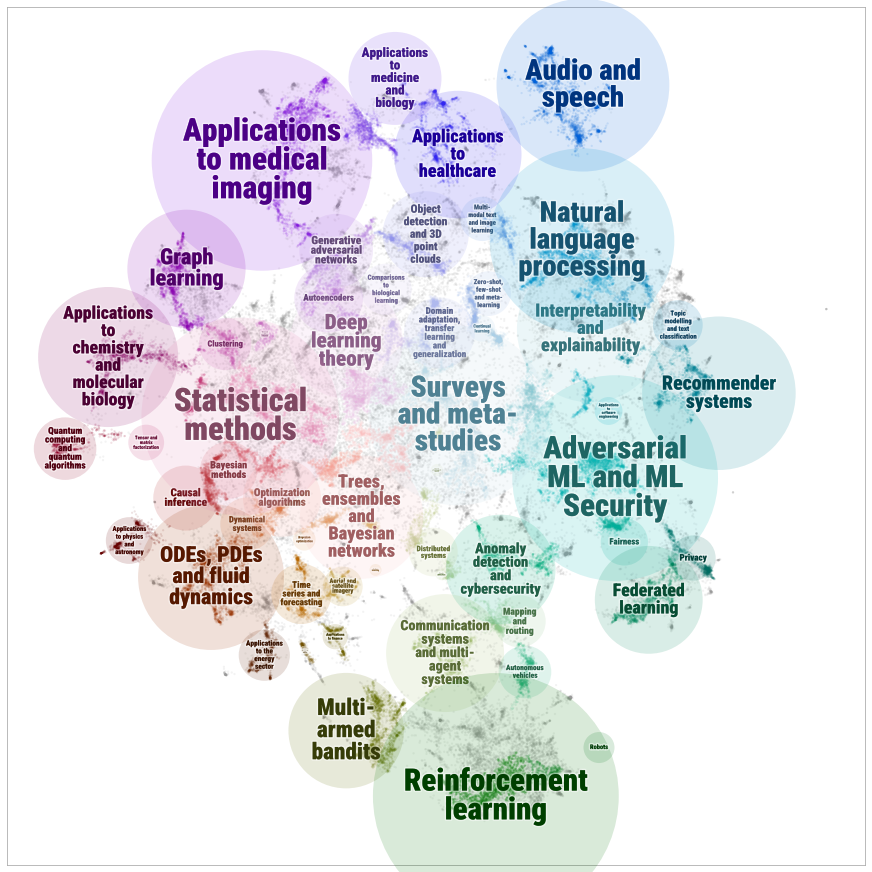

In [10]:
highlight_labels = np.unique(arxivml_labels)

fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    label_wrap_width=10,
    label_over_points=True,
    dynamic_label_size=True,
    force_matplotlib=True,
    point_size=5,
    max_font_size=36,
    min_font_size=1,
    min_font_weight=100,
    max_font_weight=1000,
    font_family="Roboto Condensed",
    highlight_labels=highlight_labels,
    highlight_label_keywords={
        "fontweight": 1000,
        "bbox": {"boxstyle": "circle", "pad": 1.0, "alpha": 0.15},
    },
    add_glow=False,
)